# Lagrange Multipliers

## Intended Learning Outcomes

By the end of this section, you should be able to:

- Describe what it means to maximise or minimise a function subject to a constraint, and recognise when such problems arise.

- Explain why, at a constrained extremum, the constraint curve (or surface) and the level set (“contour”) of the function are tangent; and that this condition leads to the relation 

    $$
     \nabla f = \lambda \nabla g
    $$
    for some scalar $\lambda$. 

- Apply the method of Lagrange multipliers in 2D to solve for points $(x,y)$ that maximise or minimise $f(x,y)$ subject to the constraing $g(x,y)=0$.

- Extend the method to higher dimensions: set up and solve the system given by $\nabla f = \lambda \nabla g$ along with the constraint $g(x_1, x_2, \ldots, x_n) = 0$ for $n$ variables $x_1, x_2, \ldots, x_n$.

- Be aware of the caveats: e.g., limits at infinity, the possibility that global maxima/minima occur at boundary or singular points, or where $\nabla f = 0$.


## Preliminary concepts
Before beginning this section, it is important to recall that the gradient of a function is perpendicular to level sets.

For example, given the function $f(x) = x^2+y^2$, the level sets are circles centred at the origin.  The gradient is 

$$
\nabla f = 2x \vec{i} + 2 y \vec{j}
$$

which points in the same direction as $x \vec{i} + y \vec{j}$, so at the location $(x,y)$, its direction is directly away from the origin.




## Maximising and minimising a function given a constraint.

Our goal in this section is to learn how to maximize or minimize a function subject to some constraint.  This arises when we want the best possible solution to a problem that depends on multiple variables, and resource limitations constrain the solutions we can achieve.  

- In an engineering context, examples occur where we want to design a product that maximizes some measurable quantity but we have a fixed budget to spend on the components.
- Examples from my own research include "how does one distribute a fixed number of vaccines across a heterogeneous population in order to minimize the rate of spread an epidemic or to minimize the number of infections, or to minimize the number of deaths."
- More broadly, these show up frequently in economics and data science applications.


Let us consider the following example which yields a nice geometric interpretation:
- Find the maximum and minimum values of the function $f(x,y) = x^2+y^2$ and their locations subject to the constraint that $g(x,y) = 0$ where $g(x,y) = 5x^2/8 + 5y^2/8 - 3xy/4-1$.

That is, if we consider all points $(x,y)$ on the contour $g(x,y)=0$, which points have the largest and smallest values of $f$ and what are those values?

To help visualize this, we use a 2D plot with the points where $g(x,y)=0$ in red and contours of $f$ in dashed blue.  The contour having the largest value on the constraint and the contour with the minimum value are shown in solid magenta.

We also plot the corresponding curves of constant $f$ in a 3D plot in blue and the values of $f$ at the points where $g(x,y)=0$ in red.  In dash-dot red in the $xy$ plane, we plot the constraint $g(x,y)=0$.




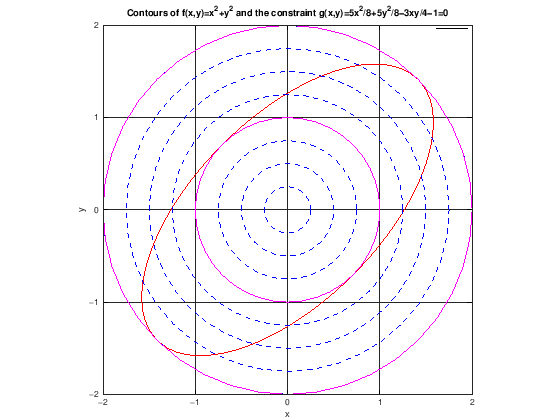

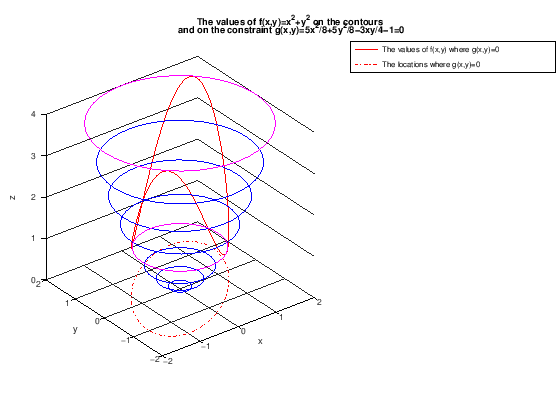

In [18]:
graphics_toolkit("gnuplot") # gnuplot is currently the only way I can get 
                            # matlab/octave to display using this format
                            # However, it is not ideal - there is no control over
                            # font sizes, line widths, or ability to interact
                            # with the plot.


% rho = [0:0.1:2];
theta = [0:pi/20:2*pi];
% [Rho,Theta] = meshgrid(rho, theta);
% X = Rho.*cos(Theta);
% Y = Rho.*sin(Theta);

x = [-2:0.1:2];
y = [-2:0.1:2];
[X,Y] = meshgrid(x,y);

G = 5*X.^2/8 + 5*Y.^2/8 -3*X.*Y/4 - 1;

%the following command plots the points given by the constraint g(x,y)=0
%and it creates a list of the x and y coordinates.
[constraint_coords,c] = contour(X,Y,G, [0,0], 'r', 'DisplayName', 'g(x,y)=0');
constraint_x = constraint_coords(1,2:end); %x coordinates of the constraint points
constraint_y = constraint_coords(2,2:end); %y coordinates of the constraint points
daspect([1,1])
xlabel('x')
ylabel('y')
hold on 
%contour(X,Y,F, [0.25,1,2.25,4])

figure(2)
plot3(constraint_x, constraint_y, constraint_x.^2+constraint_y.^2,'r', 'DisplayName', 'The values of f(x,y) where g(x,y)=0') #plot values on the constraint
hold on
plot3(constraint_x, constraint_y, zeros(size(constraint_x)),'r-.', 'DisplayName', 'The locations where g(x,y)=0') #plot the constraint points
daspect([1,1])
xlabel('x')
ylabel('y')
zlabel('z')


for radius = [0:0.25:2]; #radius of the contour
    figure(1)
    plot(radius*cos(theta), radius*sin(theta), '--', 'Color', 'b')
    figure(2)
    plot3((radius)*cos(theta), (radius).*sin(theta), radius^2*ones(size(theta)), 'Color', 'b')
    hold on
endfor

for radius = [1,2]
    figure(1)
    plot(radius*cos(theta), radius*sin(theta), 'Color', 'm')
    figure(2)
    plot3((radius)*cos(theta), (radius).*sin(theta), radius^2*ones(size(theta)), 'Color', 'm')
endfor

figure(1)
grid on
title('Contours of f(x,y)=x^2+y^2 and the constraint g(x,y)=5x^2/8+5y^2/8-3xy/4-1=0')
legend("location", 'northeast')

figure(2)
grid on
title('The values of f(x,y)=x^2+y^2 on the contours\n and on the constraint g(x,y)=5x^2/8+5y^2/8-3xy/4-1=0')
legend("location", 'northeastoutside')

## Constraint and contours are tangent at minimum/maximum

If we look at the 2D plot, an interesting property emerges.  The contour of $f$ corresponding to the largest value on the constraint $f(x,y)=2^2=4$ (the farthest out from the origin) and the contour corresponding to the smallest value $f(x,y)=1^2=1$ are both tangent to the constraint curve at the points of intersection.

This is not coincidence.  It is most easily seen by looking at a contour of $f$ that intersects the constraint curve, and is not tangent to the constraint curve.  Typically, to one side of the contour are contours corresponding to larger values of $f$ while to the other side are contours corresponding to smaller values of $f$.  Since the constraint crosses the contour of $f$, this means that to one side it encounters larger values of $f$ and to the other side it encounters smaller values.




To illustrate this, we plot the constraint again with the contours $f(x,y)=1$ (the minimum) $f(x,y)=1.5^2$ (an intermediate value), and $f(x,y)=4$ (the maximum).  At the intersections of the contours and $g(x,y)=0$ we plot $\nabla g$ and $\nabla f$.  We will be particularly interested in the intersections of $f(x,y)=1.5^2$ and $g(x,y)=0$ to see how we can tell they are not local maxima or minima.


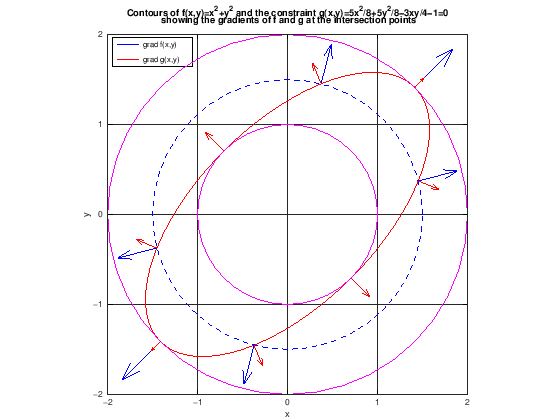

In [14]:
graphics_toolkit("gnuplot") # gnuplot is currently the only way I can get 
                            # matlab/octave to display using this format
                            # However, it is not ideal - there is no control over
                            # font sizes, line widths, or ability to interact
                            # with the plot.


theta = [0:pi/20:2*pi];

x = [-2:0.1:2];
y = [-2:0.1:2];
[X,Y] = meshgrid(x,y);

G = 5*X.^2/8 + 5*Y.^2/8 -3*X.*Y/4 - 1;

%the following command plots the points given by the constraint g(x,y)=0
%and it creates a list of the x and y coordinates.
[constraint_coords,c] = contour(X,Y,G, [0,0], 'r');
constraint_x = constraint_coords(1,2:end); %x coordinates of the constraint points
constraint_y = constraint_coords(2,2:end); %y coordinates of the constraint points
daspect([1,1])
xlabel('x')
ylabel('y')
hold on 
%contour(X,Y,F, [0.25,1,2.25,4])

for radius = [1.5]; #radius of the contour
    figure(1)
    plot(radius*cos(theta), radius*sin(theta), '--', 'Color', 'b')
endfor

for radius = [1,2]
    figure(1)
    plot(radius*cos(theta), radius*sin(theta), 'Color', 'm')
endfor

figure(1)
grid on
title('Contours of f(x,y)=x^2+y^2 and the constraint g(x,y)=5x^2/8+5y^2/8-3xy/4-1=0\n showing the gradients of f and g at the intersection points') 
%legend("location", 'northeast', 'FontSize', 10)

%the constraint can be written xi=2cos(phi), eta = sin(phi)
%with x = cos(alpha) xi - sin(alpha) eta
%and y = sin(alpha) xi + cos(alpha) eta
%where alpha is the angle of the ellipse, in this case pi/4
%after algebra, we learn cos^2(phi) = 5/12.
%taking phi = acos(sqrt(5/12)), 
alpha = pi/4;
phi = acos(sqrt(5/12));
xi = 2*cos(phi);
eta = sin(phi);
intersection_x = cos(alpha)*xi - sin(alpha)*eta;
intersection_y = sin(alpha)*xi + cos(alpha)*eta;

gradf = [2*intersection_x, 2*intersection_y]; %gradient of f at the intersection point
gradg = [5*intersection_x/4 - 3*intersection_y/4, 5*intersection_y/4 - 3*intersection_x/4]; %gradient of g at the intersection point
quiver(intersection_x, intersection_y, gradf(1), gradf(2), 0.15, 'Color', 'b', 'DisplayName', 'grad f(x,y)')
quiver(intersection_x, intersection_y, gradg(1), gradg(2), 0.15, 'Color', 'r', 'DisplayName', 'grad g(x,y)')

%now we add the arrows at the other intersection points, but without labels.
for phi = [-acos(sqrt(5/12)), acos(-sqrt(5/12)), -acos(-sqrt(5/12)), 0, pi/2, pi, 3*pi/2]
    xi = 2*cos(phi);
    eta = sin(phi);
    intersection_x = cos(alpha)*xi - sin(alpha)*eta;
    intersection_y = sin(alpha)*xi + cos(alpha)*eta;

    gradf = [2*intersection_x, 2*intersection_y]; %gradient of f at the intersection point
    gradg = [5*intersection_x/4 - 3*intersection_y/4, 5*intersection_y/4 - 3*intersection_x/4]; %gradient of g at the intersection point
    quiver(intersection_x, intersection_y, gradf(1), gradf(2), 0.15, 'Color', 'b')
    quiver(intersection_x, intersection_y, gradg(1), gradg(2), 0.15, 'Color', 'r')
endfor


legend("location", 'northwest')


(note, in the plot above, the gradients at the minima are exactly equal, so only one appears)

If we change $(x,y)$ slightly from the top point of intersection of $g(x,y)=0$ with $f(x,y)=(3/2)^2$ by moving in the clockwise direction, we increase $f$.  If we move in the counter-clockwise direction, we decrease $f$.  Inevitably, if $g(x,y)=0$ crosses the contour of $f$ at $(x_0,y_0)$, it will encounter contours on either side of the contour of $f$ through $(x_0,y_0)$.  So to avoid crossing the contour we require that the contour and $g(x,y)=0$ be tangent.

If the constraint and the contour are tangent to each other, their gradients must be parallel. This means that $\nabla f = \lambda \nabla g$ for some scalar $\lambda$ (which will typically depend on the point in space).  The scalar $\lambda$ is known as a Lagrange multiplier.  




## Method of Lagrange Multipliers in 2D:

To use Lagrange Multipliers to find local minima and maxima of $f(x,y)$ subject to the constraint $g(x,y)=0$, we follow these steps:
- Calculate $\nabla f$ and $\nabla g$
- Set $\nabla f= \lambda \nabla g$ where $\lambda$ is a scalar.
- Each component of $\nabla f = \lambda \nabla g$ gives an equation.  Add $g(x,y)=0$, to these equations to get three equations for the three unknowns at each point: $x, y, \lambda$.
- Solve the three equations for the three unknowns (there is no set recipe for doing this calculation, and for some cases it can only be solved using numerical approximation methods).
- Calculate $f$ at the points.

This procedure will find all local minima and maxima of $f$ subject to the constraint.  If the curve $g(x,y)=0$ is a closed curve (like an ellipse or a circle), then the global maxima and minima must be contained in these local minima and maxima.

Note - in the stage where we are solving the equations for the unknowns, we often end up dividing by something.  When we do this, we **always** have to consider the possibility that the thing we are dividing by is zero.  So before dividing by, say $x$, we need to check what would happen if $x=0$.


### Examples

````{prf:example} Local maxima and minima of $f(x,y) = x^2+y^2$ subject to $g(x,y)=5x^2/8+5y^2/8-3xy/4-1=0$.

:label: example:Lagrange_ex1

Consider the example investigated graphically above: $f(x,y) = x^2+y^2$ with the constraint $g(x,y) = 5x^2/8 + 5y^2/8 -3xy/4 - 1= 0$.  We have

\begin{align*}
\nabla f &= 2x \vec{i} + 2 y \vec{j}\\ 
\nabla g &= \frac{5x-3y}{4} \vec{i} + \frac{5y-3x}{4} \vec{j}
\end{align*}
Setting $\nabla f = \lambda \nabla g$

\begin{align*}
2x &= \lambda \frac{5x-3y}{4}\\
2y &= \lambda \frac{5y-3x}{4}
\end{align*}
We use the first equation to solve for $\lambda$.  
- To do this we will divide by $5x-3y$.  We need to consider the possibility that $5x-3y=0$ before we can do so.  If $5x-3y=0$, then the first equation will give $x=0$.  Further, since we are assuming $5x-3y=0$, if $x=0$ we also have $y=0$.  However, if $x=y=0$, then $g(0,0)=-1$. This contradicts the constraint $g(x,y)=0$.  Thus we conclude that $5x-3y \neq 0$.
- Thus we can be confident that $5x-3y \neq 0$, and safely divide by it.  So we have

$$
\lambda = \frac{8x}{5x-3y}
$$
The second equation then yields

\begin{align*}
2y &= \frac{8x}{5x-3y}\frac{5y-3x}{4}\\
  & = \frac{2x(5y-3x)}{5x-3y}\\
  \Rightarrow \quad  y(5x-3y) &= x(5y-3x)\\
  \Rightarrow \quad  -y^2 &= -x^2\\
  \Rightarrow \quad  y &= \pm x
\end{align*}

Now using the constraint $g(x,y)=0$ with $y = \pm x$, we get

\begin{align*}
\frac{5x^2}{8} + \frac{5x^2}{8} \pm \frac{3x^2}{4} -1 &= 0\\
\Rightarrow \quad  \frac{5x^2 \pm 3x^2}{4} &= 1
\end{align*}
with $\pm$ being $+$ if $x =-y$ and $-$ if $x=y$.
- So $2x^2 = 1$ for $x=-y$.  Then $x = \pm 1/\sqrt{2}$ and $y=-x$.
- or $x^2 = 2$ for $x=y$.  Then $x \pm \sqrt{2}$ and $y = x$.

The final points are
$(\sqrt{2}, \sqrt{2})$, $(-\sqrt{2}, -\sqrt{2})$, $(1/\sqrt{2}, -1/\sqrt{2})$, and $(-1/\sqrt{2}, 1/\sqrt{2})$.  We have

\begin{align*}
f(\sqrt{2},\sqrt{2}) &= 4\\
f(-\sqrt{2},-\sqrt{2}) &= 4\\
f(1/\sqrt{2},-1/\sqrt{2}) &= 1\\
f(-1/\sqrt{2},-1/\sqrt{2}) &= 1
\end{align*}
````



### Second Example
````{prf:example} Finding local maxima/minima of $f(x,y)=x^2-y^2$ subject to $g(x,y) = 5x^2/8 + 5y^2/8 - 3xy/4-1=0$.
:label:   example:Lagrange_ex2

Consider the same constraint, but this time with 

$$f(x,y) = x^2-y^2$$
We have 

\begin{align*}
\nabla f &= 2x \vec{i} - 2y\vec{j}\\
\nabla g &= \frac{5x-3y}{4} \vec{i} + \frac{5y-3x}{4} \vec{j}
\end{align*}

Setting $\nabla f = \lambda \nabla g$ yields
\begin{align*}
2x &= \lambda \frac{5x-3y}{4}\\
-2y &= \lambda \frac{5y-3x}{4}
\end{align*}
As in the previous example, we can assume $5x-3y\neq 0$ so we have
$$
\lambda = \frac{8x}{5x-3y}
$$
The second equation then yields

\begin{align*}
-2y &= \frac{8x}{5x-3y}\frac{5y-3x}{4}\\
  & = \frac{2x(5y-3x)}{5x-3y}\\
  \Rightarrow \quad  -y(5x-3y) &= x(5y-3x)\\
  \Rightarrow \quad  3y^2 -10xy +3x^2&= 0\\
  \Rightarrow \quad  y &= \frac{10x \pm \sqrt{100x^2 - 36x^2}}{6}\\
  &=\frac{10x \pm 8x}{6}\\
  &= 3x \text{ or } \frac{x}{3}
\end{align*}
Substituting $y=3x$ into $g(x,y)=0$ yields

\begin{align*}
\frac{5x^2}{8} + \frac{45x^2}{8} - \frac{9x^2}{4} - 1 &= 0\\
\Rightarrow \quad \frac{32x^2}{8}&= 1\\
\Rightarrow \quad x &= \pm \frac{1}{2}
\end{align*}
Substituting $y = x/3$ into $g(x,y) = 0$ yields

\begin{align*}
\frac{5x^2}{8} + \frac{5x^2}{72} - \frac{x^2}{4} -1 &= 0\\
\Rightarrow \quad \frac{32x^2}{72} &= 1\\
\Rightarrow \quad \frac{4x^2}{9} &= 1\\
\Rightarrow \quad x &= \pm \frac{3}{2}
\end{align*}

So our final points are $(1/2, 3/2)$, $(-1/2, -3/2)$, $(3/2, 1/2)$ and $(-3/2, -1/2)$.  At these values we have

\begin{align*}
f(1/2,3/2) &= (1/2)^2-(3/2)^2 \\
&= 1/4-9/4\\ 
&= -2\\
f(-1/2, -3/2) &= (-1/2)^2 - (-3/2)^2\\
&= -2\\
f(3/2, 1/2) &= (3/2)^2 - (1/2)^2\\
&= 2\\
f(-3/2, -1/2) &= (-3/2)^2 - (-1/2)^2\\
&= 2
\end{align*}
````
For reference we plot the contours of $f$ for $-2$, $-1$, $0$, $1$, and $2$ along with the constraint $g(x,y)=0$.  The constraint is just tangent to the contours of $f(x,y)=-2$ (the minimum) and $f(x,y)=2$ (the maximum)

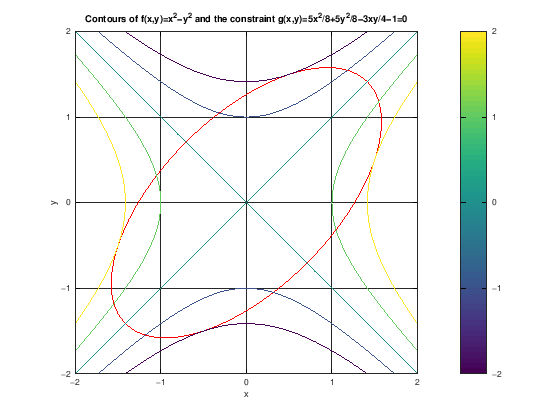

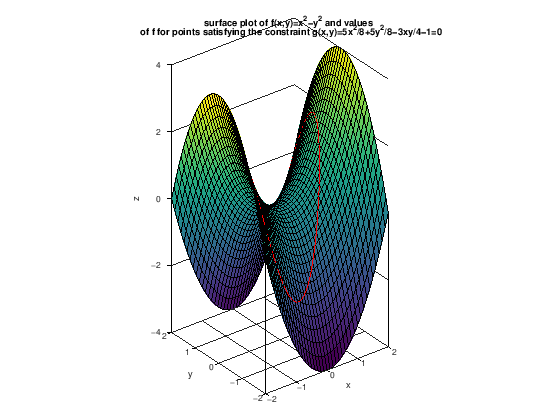

In [17]:
graphics_toolkit("gnuplot") # gnuplot is currently the only way I can get 
                            # matlab/octave to display using this format
                            # However, it is not ideal - there is no control over
                            # font sizes, line widths, or ability to interact
                            # with the plot.



x = [-2:0.1:2];
y = [-2:0.1:2];
[X,Y] = meshgrid(x,y);

G = 5*X.^2/8 + 5*Y.^2/8 -3*X.*Y/4 - 1;

%the following command plots the points given by the constraint g(x,y)=0
%and it creates a list of the x and y coordinates.
[constraint_coords,c] = contour(X,Y,G, [0,0], 'r');
constraint_x = constraint_coords(1,2:end); %x coordinates of the constraint points
constraint_y = constraint_coords(2,2:end); %y coordinates of the constraint points
daspect([1,1])
xlabel('x')
ylabel('y')
hold on 

F = X.^2 - Y.^2; 
contour(X,Y,F, [-2, -1, 0, 1, 2])
colorbar('location', 'eastoutside')

figure(1)
grid on
title('Contours of f(x,y)=x^2-y^2 and the constraint g(x,y)=5x^2/8+5y^2/8-3xy/4-1=0') 

figure(2)
surf(X,Y,F)
hold on
%in plotting the curve, we add a small value to it to make it visible above the surface.
plot3(constraint_x, constraint_y, constraint_x.^2-constraint_y.^2+0.01,'r', 'DisplayName', 'The values of f(x,y) where g(x,y)=0') #plot values on the constraint
xlabel('x')
ylabel('y')
zlabel('z')
title('surface plot of f(x,y)=x^2-y^2 and values \n of f for points satisfying the constraint g(x,y)=5x^2/8+5y^2/8-3xy/4-1=0')
daspect([1,1])


## Generalizations to higher dimension
In higher dimensions, given the constraint $g(x_1, x_2, \ldots, x_n) = 0$ we find the local maxima and minima of $f(x_1, x_2, \ldots, x_n)$ by the same approach as in the $2$-dimensional case.  We set

$$
\nabla f = \lambda \nabla g
$$
which yields $n$ equations (one equation for each $\partial/\partial x_i$).  We have $n+1$ variables ($x_1$, $x_2$, \ldots, $x_n$ and $\lambda$), so we also use the equation $g(x_1,x_2, \ldots, x_n)=0$. 

We then solve these $n+1$ equations, which yields $(x_1, x_2, \ldots, x_n)$.  We check the value of $f$ at each of these.

## Caveats
Note: 
- if the curve $g(x,y)=0$ goes off to infinity, then it may be the case that the global minimum or global maximum is only in the limit at infinity.
- if the curve $g(x,y)=0$ ends abruptly (say we had the constraint above with the additional condition $|x|\leq 1$), then the global maximum or minimum may occur at the end points.
- We have implicitly assumed $\nabla f \neq \vec{0}$ when we made the argument about contours and the constraint being tangent.  The method still works if $\nabla f = \vec{0}$ and finds a local maximum/minimum, but the contour and constraint may cross at such a point.  (see next section).



## Self-test

1. Consider the constraint $g(x,y)=0$ and the given function $f(x,y)$.  Find $\nabla f$ and $\nabla g$.  Find the equations from $\nabla f = \lambda \nabla g$ and $g(x,y)=0$.  Solve for all points $(x,y)$ satisfying this relation.  Find $f(x,y)$ at each point.
 ````{tab-set}
   ```{tab-item} Function/Constraint 1
      \begin{align*}
      f(x,y) &= 4x^2 - y^2\\
      g(x,y) &= x^2 + y^2 - 9 = 0
      \end{align*}
   ```
   ```{tab-item} Gradients 
      \begin{align*}
       \nabla f &= 8x \vec{i} - 2y \vec{j}\\
       \nabla g &= 2x \vec{i} + 2y \vec{j}
      \end{align*}
   ```
   ```{tab-item} Equations
      \begin{align*}
        8x &= 2\lambda x\\
        -2y &= 2\lambda y\\
        x^2+y^2-9 &= 0
      \end{align*}
   ```
   ```{tab-item} Coordinates
      ````{tab-set}
         ```{tab-item} Solution
            $(3,0)$, $(-3,0)$, $(0,3)$, $(0,-3)$
         ```
         ```{tab-item} Worked Solution
           If $8x=2\lambda x$, then $\lambda = 4$ or $x=0$.  We must consider both cases.
                
           - If $\lambda=4$, then the second equation becomes $-2y = 8y$ which requires $y=0$.  In turn this and $x^2+y^2-9=0$ requires $x=\pm 3$.
                
           - If $x=0$, and $\lambda$ is left free, then $x^2+y^2-9=0$ becomes $y= \pm 3$.
            
           So the solutions are $x=\pm 3$, $y=0$ if $\lambda = 4$ or $x=0$, $y=\pm 3$ if $x=0$.
         ```
      ````
   ```
   ```{tab-item} Values of $f$:
      \begin{align*}
      f(3,0) &= 4 \cdot 3^2 = 36\\
      f(-3,0) &= 36\\
      f(0,3) &= -3^2 = -9\\
      f(0,-3) &= -9
      \end{align*}
    ```
````    
 ````{tab-set}
   ```{tab-item} Function/Constraint 2
      \begin{align*}
      f(x,y) &= 4x^2 + y^2\\
      g(x,y) &= x^2 + 4y^2 - 16 = 0
      \end{align*}
   ```
   ```{tab-item} Gradients 
      \begin{align*}
       \nabla f &= 8x \vec{i} + 2y \vec{j}\\
       \nabla g &= 2x \vec{i} + 8y \vec{j}
      \end{align*}
   ```
   ```{tab-item} Equations
      \begin{align*}
        8x &= 2\lambda x\\
        2y &= 8\lambda y\\
        x^2+4y^2-16 &= 0
      \end{align*}
   ```
   ```{tab-item} Coordinates
      ````{tab-set}
         ```{tab-item} Solution
            $(4,0)$, $(-4,0)$, $(0,2)$, $(0,-2)$
         ```
         ```{tab-item} Worked Solution
           If $8x=2\lambda x$, then $\lambda = 4$ or $x=0$.  We must consider both cases.
                
           - If $\lambda=4$, then the second equation becomes $2y = 8\lambda y$ which requires $y=0$.  In turn this and $x^2+4y^2-16=0$ requires $x=\pm 4$.
                
           - If $x=0$, and $\lambda$ is left free, then $x^2+4y^2-16=0$ becomes $y= \pm 2$.
            
           So the solutions are $x=\pm 4$, $y=0$ if $\lambda = 4$ or $x=0$, $y=\pm 2$ if $x=0$.
         ```
      ````
   ```
   ```{tab-item} Values of $f$:
      \begin{align*}
      f(4,0) &= 4 \cdot 4^2 = 64\\
      f(-4,0) &= 64\\
      f(0,3) &= 3^2 = 9\\
      f(0,-3) &= 9
      \end{align*}
    ```
````    
````{tab-set}
   ```{tab-item} Function/Constraint 3
      \begin{align*}
      f(x,y) &= (x-1)^2 + (y-2)^2\\
      g(x,y) &= x^2 + y^2 - 9 = 0
      \end{align*}
      Note: these functions are not chosen to make the numbers work out nice, but rather to change from the previous problems and the examples where both $f$ and $g$ had some symmetry about the origin.  Now they do not share the same symmetry.
   ```
   ```{tab-item} Gradients 
      \begin{align*}
       \nabla f &= 2(x-1) \vec{i} + 2(y-2) \vec{j}\\
       \nabla g &= 2x \vec{i} + 2y \vec{j}
      \end{align*}
   ```
   ```{tab-item} Equations
      \begin{align*}
        2(x-1) &= 2\lambda x\\
        2(y-2) &= 2\lambda y\\
        x^2+y^2-9 &= 0
      \end{align*}
   ```
   ```{tab-item} Coordinates
      ````{tab-set}
         ```{tab-item} Solution
           $
           \left(\frac{3}{\sqrt{5}}, \frac{6}{\sqrt{5}}\right)$, $\left(\frac{-3}{\sqrt{5}}, \frac{-6}{\sqrt{5}}\right)
           $
         ```
         ```{tab-item} Worked Solution
           From the first equation, $(x-1) = \lambda x$.  It follows that $(1-\lambda)x=1$ and $x = 1/(1-\lambda)$.  Note $\lambda=1$ is impossible since that would result in $0x=1$.
           
           The second equation then gives $(y-2) = \lambda y$.  It follows that $(1-\lambda)y = 2$ and $y = 2/(1-\lambda) = 2x$.  

           Rather than substituting the expressions for $y$ and $x$ in terms of $\lambda$ into $x^2+y^2-9=0$, it is easier to take $y=2x$ and substitute it.
           
           \begin{align*}
            x^2 + (2x)^2 - 9&=0\\
            \Rightarrow \quad 5x^2 &= 9\\
            \Rightarrow \quad x^2 &= \frac{9}{5}\\
            \Rightarrow \quad x &= \pm \frac{3}{\sqrt{5}}
           \end{align*}
           Because $y=2x$, we finally arrive at $\left( \frac{3}{\sqrt{5}}, \frac{6}{\sqrt{5}}\right)$ and $\left( -\frac{3}{\sqrt{5}}, -\frac{6}{\sqrt{5}}\right)$.
         ```
      ````
   ```
   ```{tab-item} Values of $f$:
      \begin{align*}
      f\left(\frac{3}{\sqrt{5}}, \frac{6}{\sqrt{5}}\right) &=\left(\frac{3}{\sqrt{5}}-1\right)^2 + \left(\frac{6}{\sqrt{5}}-2\right)^2\\
      &= \frac{9}{5}+1 - \frac{6}{\sqrt{5}} + \frac{36}{5} +4 - \frac{24}{\sqrt{5}}\\
      &= \frac{45}{5} + 5 - \frac{30}{\sqrt{5}}\\ 
      &= 14 - 6\sqrt{5}\\
      f\left(-\frac{3}{\sqrt{5}}, -\frac{6}{\sqrt{5}}\right) &= \left(\frac{-3}{\sqrt{5}}-1\right)^2 + \left(\frac{-6}{\sqrt{5}}-2\right)^2\\
      &= \frac{9}{5}+1 + \frac{6}{\sqrt{5}} + \frac{36}{5} +4 + \frac{24}{\sqrt{5}}\\
      &= 14 + 6 \sqrt{5}
      \end{align*}
    ```
````   
````{tab-set}
   ```{tab-item} Function/Constraint 4
      \begin{align*}
      f(x,y) &= 5xy+z^2\\
      g(x,y) &= x^2 + y^2 + \frac{z^2}{9} -1 = 0
      \end{align*}
      
   ```
   ```{tab-item} Gradients 
      \begin{align*}
       \nabla f &= 5y \vec{i} + 5x \vec{j} +  2z\vec{k}\\
       \nabla g &= 2x \vec{i} + 2y \vec{j} + \frac{2}{9}z \vec{k}
      \end{align*}
   ```
   ```{tab-item} Equations
      \begin{align*}
        5y &= 2\lambda x\\
        5x &= 2\lambda y\\
        2z &= 2\lambda z/9\\
        x^2 + y^2 + \frac{z^2}{9} -1 &= 0
      \end{align*}
   ```
   ```{tab-item} Coordinates
      ````{tab-set}
         ```{tab-item} Solution
            $(0,0,3)$, $(0,0,-3)$, $(1/\sqrt{2}, 1/\sqrt{2},0)$, and $(-1/\sqrt{2},-1/\sqrt{2},0)$, $(1/\sqrt{2}, -1/\sqrt{2},0)$, and $(-1/\sqrt{2},1/\sqrt{2},0)$.
         ```
         ```{tab-item} Worked Solution

           We start by observing that the third equation gives $z=0$ or $\lambda = 9$.  Studying these two cases:
           
           - $\lambda = 9$ gives $x=45y$ and $y=45x$ in the first two equations, which is only possible if $x=y=0$.  So the final equation becomes $z^2/9-1=0$, so $z= \pm 3$.  The coordinates in the $\lambda = 0$ case are $(0,0,\pm 3)$.
        
           - If $z=0$, then $\lambda$ not yet restricted.  The first two equations become $y = \frac{4\lambda^2}{25} y$.  So $y=0$ or $\lambda = \pm 5/2$.  If $y=0$, then $x=0$ as well, but the constraint would then be $-1=0$.  So we must have $\lambda = \pm 5/2$.  In this case $x= \pm y$ or $y = \pm x$.  <BR>
           So $z=0$ implies $y=\pm x$. The third equation becomes $2x^2 =1$, so $x = \pm 1/\sqrt{2}$.  Notice that for each of the two values of $x$, we have $y = \pm x$ so this produces four points.  The coordinates in the $z=0$ case are $(1/\sqrt{2}, 1/\sqrt{2}, 0)$, $(1/\sqrt{2}, - 1/\sqrt{2},0)$, $(-1/\sqrt{2}, 1/\sqrt{2}, 0)$, and $(-1/\sqrt{2}, - 1/\sqrt{2},0)$.


         ```
      ````
   ```
   ```{tab-item} Values of $f$:
     \begin{align*}
      f(0,0,3) &= 9\\
      f(0,0,-3) &= 9\\
      f\left(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}},0\right) &= 5/2\\
      f\left(-\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}},0\right) &= 5/2\\
      f\left(\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}},0\right) &= -5/2\\
      f\left(-\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}},0\right) &= -5/2
     \end{align*}
   ```
````

For reference, here is a heat map plot of $f(x,y,z)$ for the final part on the points on the surface $g(x,y,z)=0$.  The intermediate points turn out to be saddles.

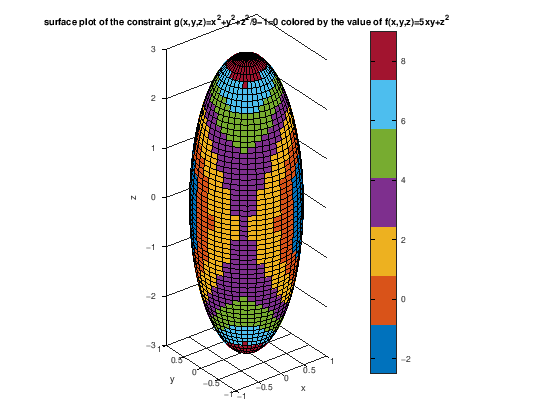

In [ ]:
graphics_toolkit("gnuplot") # gnuplot is currently the only way I can get 
                            # matlab/octave to display using this format
                            # However, it is not ideal - there is no control over
                            # font sizes, line widths, or ability to interact
                            # with the plot.



z = [-3:0.1:3];
theta = [0:pi/20:2*pi];

[Theta, Z] = meshgrid(theta, z);
Rho = sqrt(1-Z.^2/9);
X = Rho.*cos(Theta);
Y = Rho.*sin(Theta);

F = 5*X.*Y + Z.^2;

surf(X,Y,Z,F);
%colormap(turbo)
colormap(lines(7))
hold on 
colorbar('location', 'eastoutside')
xlabel('x')
ylabel('y')
zlabel('z')
title('surface plot of the constraint g(x,y,z)=x^2+y^2+z^2/9-1=0 colored by the value of f(x,y,z)=5xy+z^2')
daspect([1,1])



2. (*) (not yet completed problem, just some notes.  The goal is to investigate a case where gradient of $f$ goes to zero at a point.) what if constraint crosses $f$ at a local maximum/minimum/other critical point?  Answer: At this point, even if it crosses the contour, the gradient of $f$ is $\vec{0}$.